In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
ROUNDS = 5
PLAYER = 50
GENERS = 200

In [63]:
data = np.loadtxt("gen 200, round 5, sol 50/data.txt").reshape((GENERS + 1, ROUNDS, PLAYER)).astype(int)

In [64]:
means = []

for gen in data:
    temp_round = []
    for round in gen:
        temp_round.append(np.mean(round))
        #plt.bar(range(100), np.bincount(round, minlength=100))
        #plt.show()
    means.append(np.mean(temp_round))

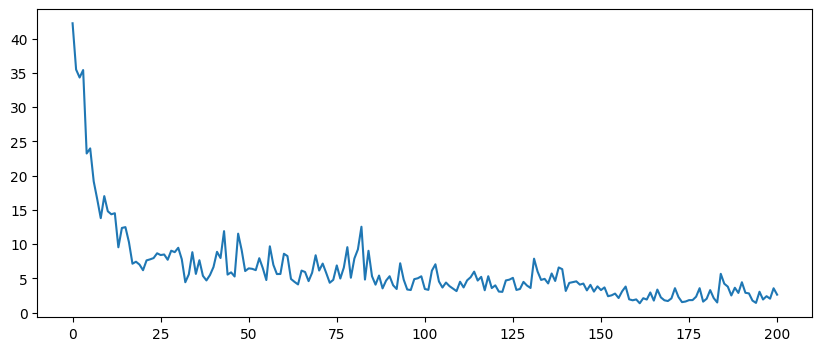

In [99]:
plt.figure(figsize=(10, 4))
plt.plot(range(len(means)), means)

In [66]:
MAX_VAL = np.max(data) + 1


plt.bar(range(MAX_VAL), np.bincount(data[-1,-1], minlength=MAX_VAL))

<BarContainer object of 125 artists>

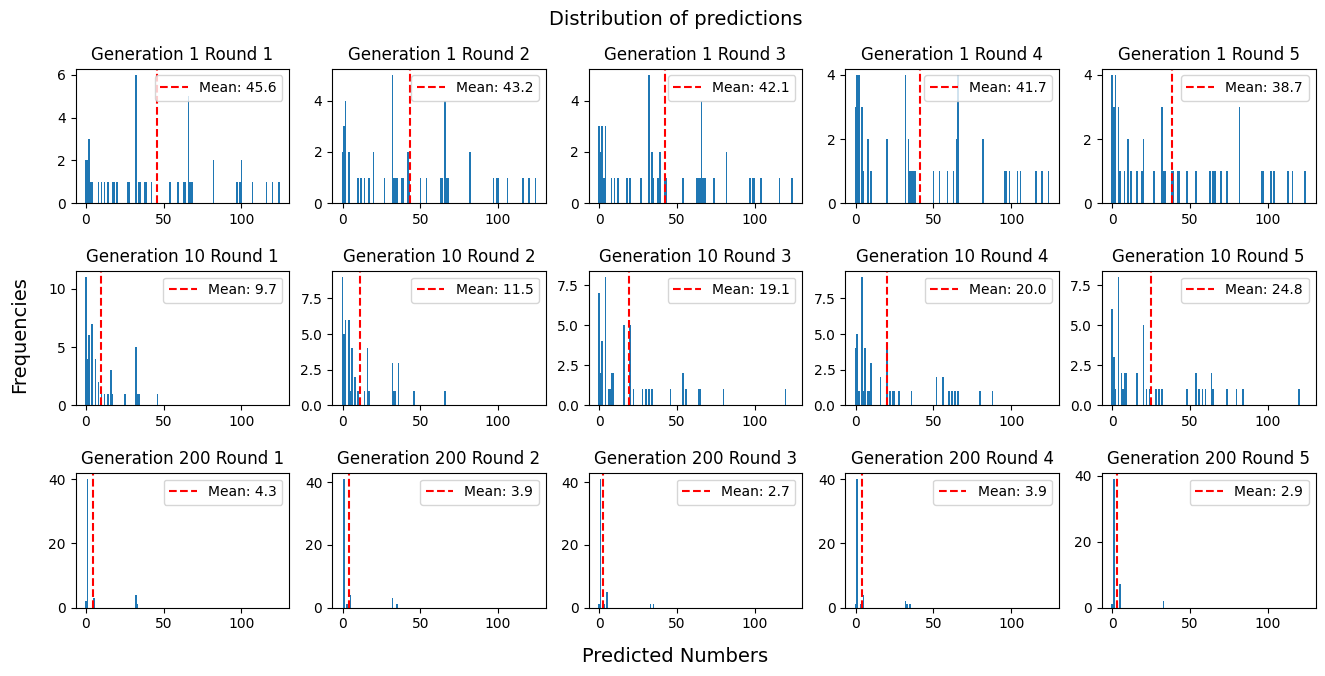

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 7))
#plt.tight_layout()

generatio = [0, 9, GENERS - 1]

for gen in range(3):
    for i in range(5): 
        axes[gen, i].bar(range(MAX_VAL), np.bincount(data[generatio[gen], i], minlength=MAX_VAL), width = 1)
        axes[gen, i].axvline(np.mean(data[generatio[gen], i]), color="red", linestyle='--', label=f"Mean: {np.mean(data[generatio[gen], i]):.1f}")
        axes[gen, i].set_title(f"Generation {generatio[gen] + 1} Round {i + 1}")
        axes[gen, i].legend()


fig.subplots_adjust(hspace=0.5) 
fig.text(0.5, 0.95, "Distribution of predictions", ha='center', va='center', fontsize=14)
fig.text(0.5, 0.04, 'Predicted Numbers', ha='center', va='center', fontsize=14)
fig.text(0.09, 0.5, 'Frequencies', ha='center', va='center', rotation='vertical', fontsize=14)
plt.savefig(f"gen{GENERS}round{ROUNDS}pop{PLAYER} distribution.pdf")
